# DADOS ENEM 2019 

### Para começarmos, vamos importar a biblioteca pandas com o comando abaixo e apontar o caminho para a amostra de dados que esta em csv, essa amostra foi retirada do github da alura, você tambem pode buscar os dados no site da INEP. 

In [2]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

#podemos verificar a tabela com o comando head, ele retorna as 5 primeiras linhas.

dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [7]:
'''aqui estou verificando os dados por coluna, é importante ter o arquivo "dicionario_microdado"
para saber o que sinifica os titulos de cada coluna, nesse caso o "Q025" é a coluna que pergunta se o candidato
tem internet, sendo A para não e B para sim.
'''
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [19]:
#pessoas que não tem internet em casa separado por estado!
dados.query("Q025 == 'A'")["SG_UF_RESIDENCIA"].value_counts()

PA    3568
MA    2624
CE    2373
BA    2338
MG    2166
SP    2078
PE    1326
AM    1310
PI    1279
RJ    1151
PB     826
GO     756
RS     756
RN     662
AL     631
SE     554
PR     539
AP     518
MT     516
AC     485
TO     414
RO     363
ES     343
MS     342
DF     332
SC     207
RR     130
Name: SG_UF_RESIDENCIA, dtype: int64

In [42]:
#Indigenas separado por estado
dados.query("TP_COR_RACA == 5")["SG_UF_RESIDENCIA"].value_counts()

PE    96
AM    85
SP    70
BA    67
MG    52
PA    45
MS    40
PB    40
RJ    39
CE    37
MA    25
AL    23
GO    17
PI    17
RR    16
PR    14
DF    14
MT    13
SE    12
RN    11
RS    10
AC    10
AP     9
SC     9
RO     9
ES     8
TO     4
Name: SG_UF_RESIDENCIA, dtype: int64

<AxesSubplot:>

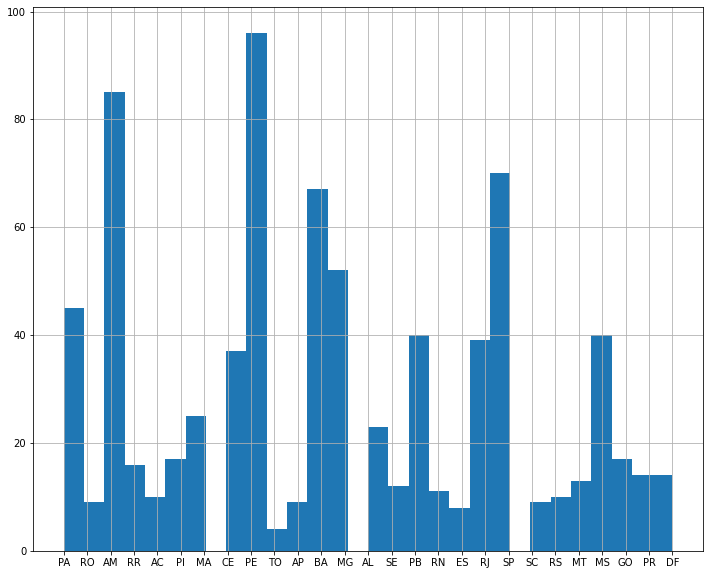

In [37]:
#histograma de indiginas separado por estado.
dados.query("TP_COR_RACA == 5")["SG_UF_RESIDENCIA"].hist(bins = 30, figsize = (12,10))